In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
cols = ["No", "Time_Offset", "Type", "CAN_ID", "Data_Length", 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight']

In [2]:
#importing dataset
def Convert_to_df(path):
    if path[-3:] == "trc":
        data_df = Convert_from_trc(path)[17:]
    elif path[-3:] == "txt": 
        data_df = Convert_from_txt(path)[18:]
    else:
        print("Error, not suitable file")
        exit()
    return data_df

In [3]:
def Convert_from_trc(path):
    test = pd.read_csv(path, encoding='cp949', index_col=0)
    b = []
    for i in test.index:
        temp = i.split(" ")
        b.append(list(filter(('').__ne__, temp)))
    final = pd.DataFrame(b, columns = cols)
    return final

In [4]:
#importing dataset
def Convert_from_txt(path):
    test = pd.read_csv(path, encoding='cp949', index_col=0)
    b = []
    for i in test.index:
        temp = i.split("\t")
        b.append(list(filter(('').__ne__, temp)))
    final = pd.DataFrame(b, columns = cols)
    return final

In [5]:
def find_IDs(data_frame):
    temp1 = data_frame["ID"]
    return list(dict.fromkeys(temp1))

In [6]:
def process_can_data(file_name):
    """
    Processes CAN data from a file, calculates time gaps, 
    and returns a DataFrame with the selected columns and a new 'Time_Gap' column.
    
    Args:
        file_name (str): The name of the CAN data file to process.
        
    Returns:
        pd.DataFrame: Processed DataFrame with the specified columns and 'Time_Gap'.
    """
    # Convert the input file into a DataFrame
    data_in_can_normal = Convert_to_df(file_name)
    
    # Select the required columns
    selected_columns = ["Time_Offset", "Type", "CAN_ID", "Data_Length",
                        "One", "Two", "Three", "Four", "Five", "Six", 
                        "Seven", "Eight"]
    data_in_can_normal = data_in_can_normal[selected_columns]
    
    # Calculate the time difference and create the 'Time_Gap' column
    data_in_can_normal["Time_Gap"] = data_in_can_normal["Time_Offset"].astype(float).diff()
    
    return data_in_can_normal

In [7]:
data_in_can_normal = "/media/arupreza/Assets/LIN_CAN/SCI_dataset/CAN/normal/"
data_in_can_attak = "/media/arupreza/Assets/LIN_CAN/SCI_dataset/CAN/attack/"

In [8]:
data_in_can_normal = process_can_data(data_in_can_normal + "normal_CAN_data(10min).trc")
data_in_can_normal_0510 = data_in_can_normal[data_in_can_normal["CAN_ID"] == "0510"]
data_in_can_normal_0510

,Time_Offset,Type,CAN_ID,Data_Length,One,Two,Three,Four,Five,Six,Seven,Eight,Time_Gap
20,15.6,Rx,0510,8,00,00,00,00,04,12,00,00,2.8
51,115.6,Rx,0510,8,00,00,00,00,04,12,00,00,4.6
84,215.6,Rx,0510,8,00,00,00,00,04,12,00,00,5.4
115,315.5,Rx,0510,8,00,00,00,00,04,12,00,00,5.2
146,415.6,Rx,0510,8,00,00,00,00,04,12,00,00,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185768,600108.1,Rx,0510,8,00,00,1B,00,0C,16,00,00,2.3
185798,600208.1,Rx,0510,8,00,00,1B,00,0C,16,00,00,2.3
185829,600308.1,Rx,0510,8,00,00,1B,00,0C,16,00,00,4.1
185859,600408.1,Rx,0510,8,00,00,1B,00,0C,16,00,00,4.3


In [9]:
data_in_can_fuzz = process_can_data(data_in_can_attak + "CAN_fuzzing_attack(10min).trc")
data_in_can_fuzz_0510 = data_in_can_fuzz[data_in_can_fuzz["CAN_ID"] == "0510"]
data_in_can_fuzz_0510

,Time_Offset,Type,CAN_ID,Data_Length,One,Two,Three,Four,Five,Six,Seven,Eight,Time_Gap
24,27.8,Rx,0510,8,00,00,00,00,04,12,00,00,2.9
54,127.8,Rx,0510,8,00,00,00,00,04,12,00,00,7.4
85,227.8,Rx,0510,8,00,00,00,00,04,12,00,00,7.4
116,327.8,Rx,0510,8,00,00,00,00,04,12,00,00,3.8
147,427.8,Rx,0510,8,00,00,00,00,04,12,00,00,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186429,600120.4,Rx,0510,8,00,00,00,00,00,00,00,00,5.4
186459,600220.4,Rx,0510,8,00,00,00,00,00,00,00,00,9.1
186490,600320.4,Rx,0510,8,00,00,00,00,00,00,00,00,9.7
186521,600420.4,Rx,0510,8,00,00,00,00,00,00,00,00,6.1


In [10]:
data_in_can_rep = process_can_data(data_in_can_attak + "CAN_replay_attack(10min).trc")
data_in_can_rep_0510 = data_in_can_rep[data_in_can_rep["CAN_ID"] == "0510"]
data_in_can_rep_0510

,Time_Offset,Type,CAN_ID,Data_Length,One,Two,Three,Four,Five,Six,Seven,Eight,Time_Gap
40,90.8,Rx,0510,8,00,00,00,00,04,12,00,00,0.6
69,190.8,Rx,0510,8,00,00,00,00,04,12,00,00,0.6
95,290.8,Rx,0510,8,00,00,00,00,04,12,00,00,0.7
124,390.8,Rx,0510,8,00,00,00,00,04,12,00,00,0.6
152,490.8,Rx,0510,8,00,00,00,00,04,12,00,00,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185926,600083.2,Rx,0510,8,00,00,1B,00,0C,14,00,00,2.0
185958,600183.2,Rx,0510,8,00,00,1B,00,0C,14,00,00,2.0
185988,600283.2,Rx,0510,8,00,00,1B,00,0C,14,00,00,2.0
186020,600383.2,Rx,0510,8,00,00,1B,00,0C,14,00,00,0.8


In [ ]:
data_in_can_normal_0510['One']

,Time_Offset,Type,CAN_ID,Data_Length,One,Two,Three,Four,Five,Six,Seven,Eight,Time_Gap
20,15.6,Rx,0510,8,00,00,00,00,04,12,00,00,2.8
51,115.6,Rx,0510,8,00,00,00,00,04,12,00,00,4.6
84,215.6,Rx,0510,8,00,00,00,00,04,12,00,00,5.4
115,315.5,Rx,0510,8,00,00,00,00,04,12,00,00,5.2
146,415.6,Rx,0510,8,00,00,00,00,04,12,00,00,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185768,600108.1,Rx,0510,8,00,00,1B,00,0C,16,00,00,2.3
185798,600208.1,Rx,0510,8,00,00,1B,00,0C,16,00,00,2.3
185829,600308.1,Rx,0510,8,00,00,1B,00,0C,16,00,00,4.1
185859,600408.1,Rx,0510,8,00,00,1B,00,0C,16,00,00,4.3


In [13]:
def parse_trc_file_with_gap(file_path):
    """
    Parses a .trc file, creates a DataFrame with specified columns, 
    converts Time_Offset to milliseconds, and calculates Time_Gap.

    Args:
        file_path (str): Path to the .trc file.

    Returns:
        pd.DataFrame: Parsed data as a DataFrame with a Time_Gap column.
    """
    # List to store extracted rows
    data = []

    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            # Skip lines that are comments or metadata
            if line.strip().startswith(";") or line.strip() == "":
                continue

            # Split the line into fields, filtering out empty entries
            elements = list(filter(None, line.strip().split(" ")))

            try:
                # Extract required fields based on column positions
                time_offset = float(elements[1]) / 1000  # Convert to milliseconds
                msg_type = elements[2]                 # Direction (Type)
                lin_id = elements[3]                   # LIN_ID (Frame-ID)
                data_length = int(elements[4])         # Data_Length
                data_bytes = elements[5:5 + data_length]  # Data bytes
                checksum = elements[5 + data_length]   # Checksum
                checksum_type = elements[6 + data_length]  # Checksum Type
                error_code = elements[7 + data_length] if len(elements) > 7 + data_length else None  # Error Code

                # Pad data bytes to ensure consistency for columns One to Five and replace missing bytes with None
                data_bytes = data_bytes + [None] * (5 - len(data_bytes))

                # Append the extracted row to the data list
                data.append([
                    time_offset, msg_type, lin_id, data_length,
                    data_bytes[0], data_bytes[1], data_bytes[2],
                    data_bytes[3], data_bytes[4], checksum,
                    checksum_type, error_code
                ])
            except Exception as e:
                print(f"Error parsing line: {line.strip()} | Error: {e}")
                continue

    # Define the column names for the DataFrame
    columns = ["Time_Offset", "Type", "LIN_ID", "Data_Length",
               "One", "Two", "Three", "Four", "Five",
               "Checksum", "Checksum_Type", "Error_Code"]

    # Create the DataFrame
    df = pd.DataFrame(data, columns=columns)

    # Replace any empty strings in the DataFrame with None
    df = df.replace("", None)

    # Calculate Time_Gap as the difference between consecutive Time_Offset values
    df["Time_Gap"] = df["Time_Offset"].diff()

    return df

In [14]:
data_in_lin_normal = "/media/arupreza/Assets/LIN_CAN/SCI_dataset/LIN/normal/"
data_in_lin_attak = "/media/arupreza/Assets/LIN_CAN/SCI_dataset/LIN/attack/"

In [19]:
data_in_lin_nor = parse_trc_file_with_gap(data_in_lin_normal + "LIN_normal_(10min).ltrc")
data_in_lin_nor["Time_Offset"] = data_in_lin_nor["Time_Offset"]/1000
data_in_lin_nor["Time_Gap"] = data_in_lin_nor["Time_Offset"].diff(1)
data_in_lin_nor

,Time_Offset,Type,LIN_ID,Data_Length,One,Two,Three,Four,Five,Checksum,Checksum_Type,Error_Code,Time_Gap
0,0.021408,SubAL,00,2,00,FF,None,None,None,7F,EH,None,NaN
1,0.031406,SubAL,08,5,08,03,01,08,08,DB,EH,None,0.009998
2,0.091404,SubAL,03,2,00,FF,None,None,None,FC,EH,None,0.059998
3,0.101411,SubAL,08,5,07,03,01,02,07,E3,EH,None,0.010007
4,0.161414,SubAL,00,2,00,FF,None,None,None,7F,EH,None,0.060003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22899,610.654167,SubAL,08,5,07,03,01,02,07,E3,EH,None,0.010011
22900,610.714163,SubAL,00,2,00,FF,None,None,None,7F,EH,None,0.059996
22901,610.724160,SubAL,01,2,00,FF,None,None,None,3E,EH,None,0.009997
22902,610.734164,SubAL,02,2,00,FF,None,None,None,BD,EH,None,0.010004


In [20]:
data_in_lin_fuzz = parse_trc_file_with_gap(data_in_lin_attak + "LIN_fuzzing_attack(10min).ltrc")
data_in_lin_fuzz["Time_Offset"] = data_in_lin_fuzz["Time_Offset"]/1000
data_in_lin_fuzz["Time_Gap"] = data_in_lin_fuzz["Time_Offset"].diff(1)
data_in_lin_fuzz

,Time_Offset,Type,LIN_ID,Data_Length,One,Two,Three,Four,Five,Checksum,Checksum_Type,Error_Code,Time_Gap
0,0.033770,SubAL,03,2,07,FF,None,None,None,F5,EH,None,NaN
1,0.043763,SubAL,08,5,07,03,01,02,07,E3,EH,None,0.009993
2,0.103766,SubAL,00,2,00,FF,None,None,None,7F,EH,None,0.060003
3,0.113770,SubAL,01,2,03,FF,None,None,None,3B,EH,None,0.010004
4,0.123764,SubAL,02,2,00,FF,None,None,None,BD,EH,None,0.009994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22583,601.957059,SubAL,08,0,None,None,None,None,None,00,AU,SR,0.009996
22584,601.958839,SubAL,15,0,None,None,None,None,None,00,AU,IS/SR,0.001780
22585,602.027063,SubAL,01,4,C2,2B,92,03,None,BA,EH,None,0.068224
22586,602.037057,SubAL,02,8,5B,5F,AF,6C,59,96,EH,None,0.009994


In [21]:
data_in_lin_rep = parse_trc_file_with_gap(data_in_lin_attak + "LIN_replay_attack(10min).ltrc")
data_in_lin_rep["Time_Offset"] = data_in_lin_rep["Time_Offset"]/1000
data_in_lin_rep["Time_Gap"] = data_in_lin_rep["Time_Offset"].diff(1)
data_in_lin_rep

,Time_Offset,Type,LIN_ID,Data_Length,One,Two,Three,Four,Five,Checksum,Checksum_Type,Error_Code,Time_Gap
0,0.020115,SubAL,00,2,00,FF,None,None,None,7F,EH,None,NaN
1,0.030123,SubAL,01,2,03,FF,None,None,None,3B,EH,None,0.010008
2,0.040113,SubAL,02,2,00,FF,None,None,None,BD,EH,None,0.009990
3,0.050121,SubAL,08,5,0E,03,01,04,0E,D3,EH,None,0.010008
4,0.110121,SubAL,01,2,00,FF,None,None,None,3E,EH,None,0.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22531,600.773153,SubAL,08,0,None,None,None,None,None,00,AU,SR,0.009993
22532,600.774933,SubAL,15,0,None,None,None,None,None,00,AU,IS/SR,0.001780
22533,600.673151,SubAL,02,2,00,FF,None,None,None,BD,EH,None,-0.101782
22534,600.844941,SubAL,15,0,None,None,None,None,None,00,AU,IS/SR,0.171790


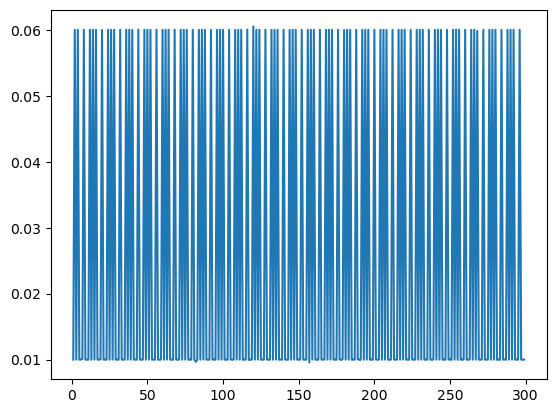

In [24]:
plt.plot(data_in_lin_nor['Time_Gap'][:300])

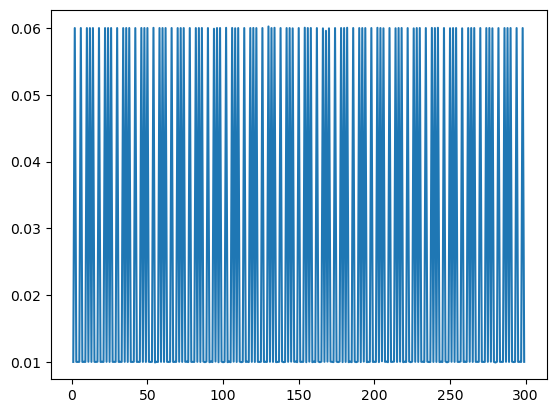

In [25]:
plt.plot(data_in_lin_fuzz['Time_Gap'][:300])

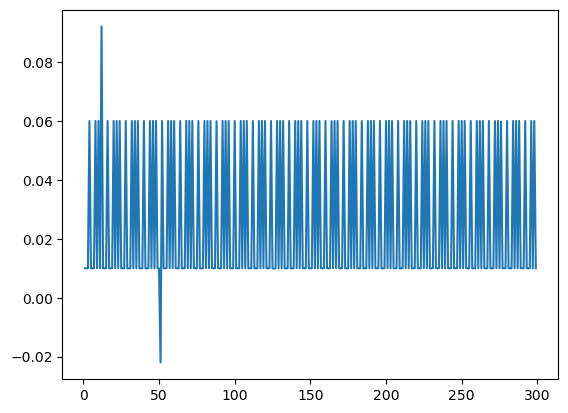

In [26]:
plt.plot(data_in_lin_rep['Time_Gap'][:300])